In [56]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob

YEAR = '2020'

In [57]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          991 non-null    object 
 1   Authors                 901 non-null    object 
 2   Author Affiliations     900 non-null    object 
 3   Publication Title       991 non-null    object 
 4   Date Added To Xplore    991 non-null    object 
 5   Publication Year        991 non-null    int64  
 6   Volume                  991 non-null    int64  
 7   Issue                   991 non-null    int64  
 8   Start Page              991 non-null    object 
 9   End Page                991 non-null    object 
 10  Abstract                991 non-null    object 
 11  ISSN                    991 non-null    object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     991 non-null    object 
 14  Funding Information     727 non-null    ob

In [58]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          991 non-null    object 
 1   Authors                 901 non-null    object 
 2   Author Affiliations     900 non-null    object 
 3   Publication Title       991 non-null    object 
 4   Date Added To Xplore    991 non-null    object 
 5   Publication Year        991 non-null    int64  
 6   Volume                  991 non-null    int64  
 7   Issue                   991 non-null    int64  
 8   Start Page              991 non-null    object 
 9   End Page                991 non-null    object 
 10  Abstract                991 non-null    object 
 11  ISSN                    991 non-null    object 
 12  DOI                     991 non-null    object 
 13  Funding Information     727 non-null    object 
 14  PDF Link                991 non-null    ob

In [59]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              901 non-null    object
 1   Author Affiliations  900 non-null    object
 2   Publication Year     991 non-null    int64 
 3   Funding Information  727 non-null    object
 4   Author Keywords      889 non-null    object
 5   IEEE Terms           902 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.6+ KB


In [60]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              900 non-null    object
 1   Author Affiliations  900 non-null    object
 2   Publication Year     900 non-null    int64 
 3   Funding Information  727 non-null    object
 4   Author Keywords      889 non-null    object
 5   IEEE Terms           899 non-null    object
dtypes: int64(1), object(5)
memory usage: 42.3+ KB


In [61]:
data.to_csv(f'data\\{YEAR}\\aggregate\\combined.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,K. Lu; K. W. Leung,State Key Laboratory of Terahertz and Millimet...,2020,General Research Fund (GRF) Research Grant fro...,Antenna radiation patterns;broadband antennas;...,Apertures;Dielectric resonator antennas;Receiv...
1,N. -W. Liu; L. Zhu; Z. -X. Liu; Z. -Y. Zhang; ...,National Key Laboratory of Antennas and Microw...,2020,National Natural Science Foundation of China(g...,Cross-polarization reduction;open-ended stubs;...,Antenna radiation patterns;Electromagnetic com...
2,O. A. Iupikov; W. Hallberg; R. Maaskant; C. Fa...,"Electrical Engineering Department, Chalmers Un...",2020,"Ericsson, Gapwaves, Bluetest and the Strategic...",Antenna integration;Doherty power amplifier,Antennas
3,L. Gong; Y. Fu; K. Y. Chan; J. A. Nanzer; R. R...,School of Electrical Engineering and Telecommu...,2020,Australian Research Council(grant numbers:DP17...,Phase correction;pyramidal horn antennas;sidel...,Horn antennas;Loaded antennas;Antenna radiatio...
4,S. Dey; D. Chatterjee; E. J. Garboczi; A. M. H...,Department of Computer Science and Electrical ...,2020,National Institute of Standards and Technology...,Characteristic mode analysis (CMA);method of m...,Optimization;Shape;Method of moments;Plasmons;...


In [62]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data ['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            print(author)
        if aff.split(', ')[-1] in ('Fuzhou', 'Nanyang Technological University', 'WC1E 6BT', 'Macao'):
            print(f'{author}: {aff}')
        countries.append(aff.split(', ')[-1])

Z. Lan: Department of Electronic and Electrical Engineering, University College London, London, WC1E 6BT
W. E. I. Sha: Department of Electronic and Electrical Engineering, University College London, London, WC1E 6BT
Z. Shen: School of Electrical and Electronic Engineering, Nanyang Technological University
Z. Chen: College of Physics and Information Engineering, Fuzhou University, Fuzhou
Z. -X. Liu: Department of Electrical and Computer Engineering, Faculty of Science and Technology, University of Macau, Macao, Macao
L. Zhu: Department of Electrical and Computer Engineering, Faculty of Science and Technology, University of Macau, Macao, Macao
N. -W. Liu: Department of Electrical and Computer Engineering, Faculty of Science and Technology, University of Macau, Macao, Macao
Y. Zhang
D. Liu


In [63]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace("Republic of Korea", "South Korea")
countries = countries.replace("Korea", "South Korea")
countries = countries.replace("United Arab Emirates", "UAE")
countries = countries.replace("Türkiye", "Turkey")
countries = countries.replace("Türkey", "Turkey")
countries = countries.replace("Hong Kong SAR", "Hong Kong")
countries = countries.replace("Netherlands", "The Netherlands")
countries = countries.replace("SAR", "SAR China")
countries = countries.replace("U.K", "U.K.")
countries = countries.replace("China,", "China")
countries = countries.replace("P. R. China", "China")
countries = countries.replace("the Czech Republic", "Czech Republic")
countries = countries.replace("USA.", "USA")
countries = countries.replace("Italy.", "Italy")
countries = countries.replace("China.", "China")
countries = countries.replace("WC1E 6BT", "U.K.")
countries = countries.replace("Macao", "Macau")
countries = countries.replace("Fuzhou", "China")
countries = countries.replace("Nanyang Technological University", "Singapore")
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)

<class 'pandas.core.series.Series'>
RangeIndex: 3696 entries, 0 to 3695
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
3696 non-null   object
dtypes: object(1)
memory usage: 29.0+ KB
None
<class 'pandas.core.series.Series'>
Index: 3694 entries, 0 to 3695
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
3694 non-null   object
dtypes: object(1)
memory usage: 57.7+ KB
None
China                     1537
USA                        440
Canada                     170
Italy                      155
Australia                  130
U.K.                       119
South Korea                104
Spain                      101
France                      87
Hong Kong                   83
Singapore                   75
India                       66
The Netherlands             58
Germany                     57
Sweden                      54
Iran                        54
Russia                      36
Finland                     33
Japan                       31
Malays

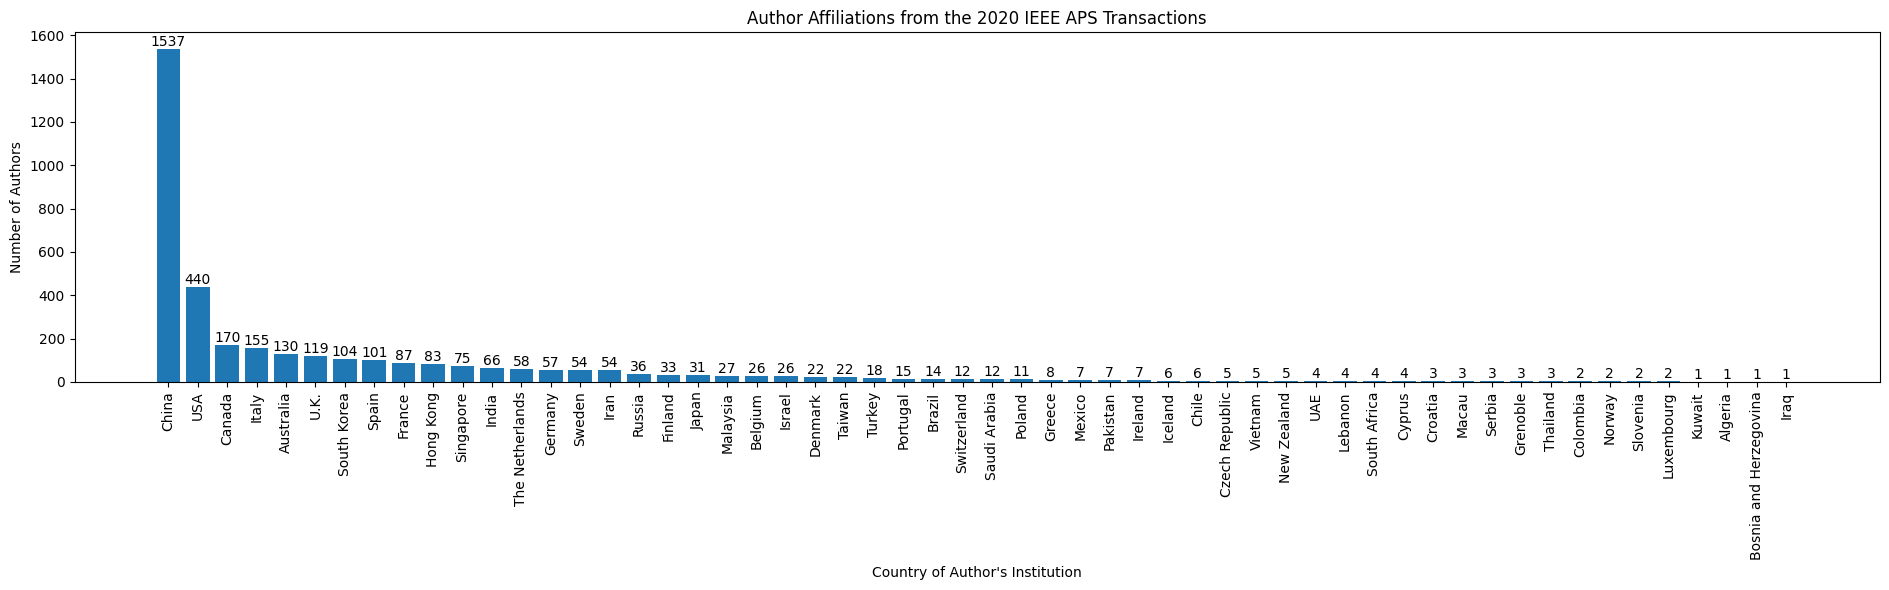

In [64]:
fig, ax = plt.subplots(figsize=(19, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [65]:
super_counts = counts[counts >= 75]
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


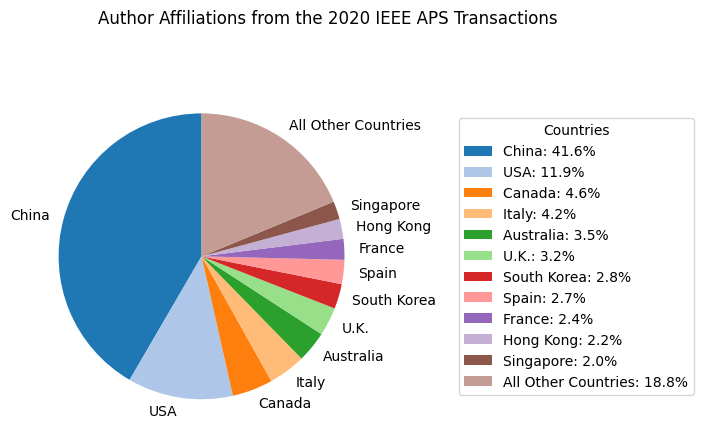

In [66]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()